In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
from IPython import display
%matplotlib inline

In [3]:
def plot_vectors(q,p,ax):
    ax.plot(*np.vstack([[0,0,0],q]).T,'b')
    ax.plot(*np.vstack([[0,0,0],p]).T,'r')
    
def plot_coordinateFrame():
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot(*np.vstack([[-1,0,0],[1,0,0]]).T,'k')
    ax.plot(*np.vstack([[0,-1,0],[0,1,0]]).T,'k')
    ax.plot(*np.vstack([[0,0,-1],[0,0,1]]).T,'k')

    ax.auto_scale_xyz([-1,1],[-1,1],[-1,1])
    ax.set_yticks([-1,0,1])
    ax.set_xticks([-1,0,1])
    ax.set_zticks([-1,0,1])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    return ax

In [4]:
### initialize field ###

# field strength
b = 1

# unit vector along z-axis (initial field vector)
q=np.array([0,0,b])/np.sqrt(0**2 + 0**2 + b**2)

# rotating field vector (perpendicular to field vector)
theta = 0
p = np.array([b*np.cos(np.deg2rad(theta)),b*np.sin(np.deg2rad(theta)),0])

### field direction ###
alpha = 45 # rotation about original y axis
beta = 45 # rotation about original z axis

# rotation matrix
rotation_matrix = np.array([[np.cos(np.deg2rad(beta))*np.cos(np.deg2rad(alpha)), -np.sin(np.deg2rad(beta)), np.cos(np.deg2rad(beta))*np.sin(np.deg2rad(alpha))],
                            [np.sin(np.deg2rad(beta))*np.cos(np.deg2rad(alpha)), np.cos(np.deg2rad(beta)), np.sin(np.deg2rad(beta))*np.sin(np.deg2rad(alpha))],
                            [-np.sin(np.deg2rad(alpha)), 0, np.cos(np.deg2rad(alpha))] ])

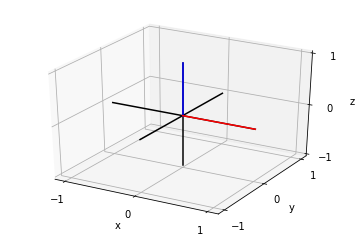

In [5]:
# plot coordinate frame
ax = plot_coordinateFrame()
# plotinitial vector state
plot_vectors(q,p,ax)

The dot product of perpendicular vectors q and p should be ~zero: 1.11022e-16


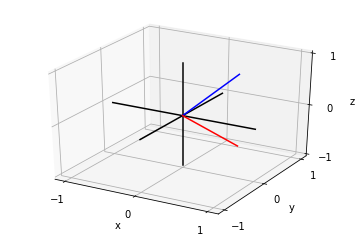

In [6]:
# set field direction
new_q = np.dot(rotation_matrix,q)
new_p = np.dot(rotation_matrix,p)

ax = plot_coordinateFrame()
plot_vectors(new_q,new_p,ax)

print('The dot product of perpendicular vectors q and p should be ~zero: %g' % np.dot(new_q,new_p))

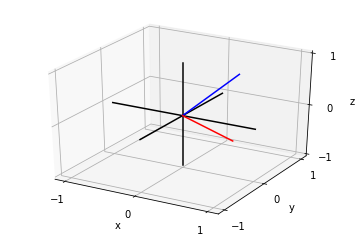

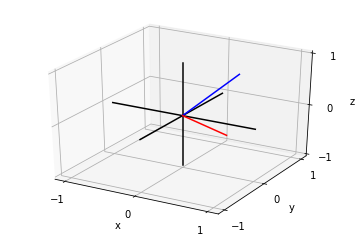

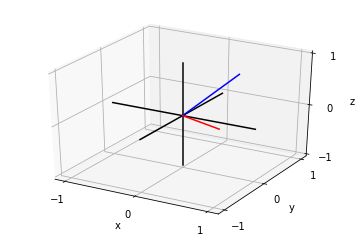

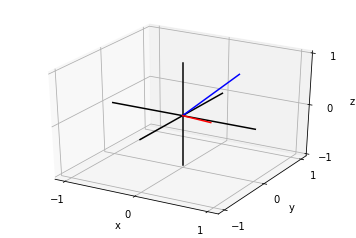

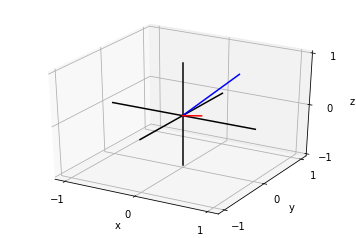

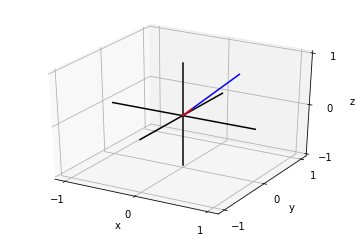

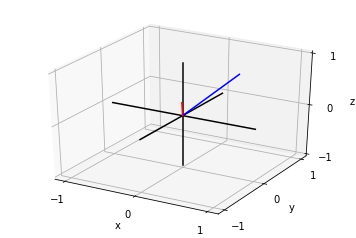

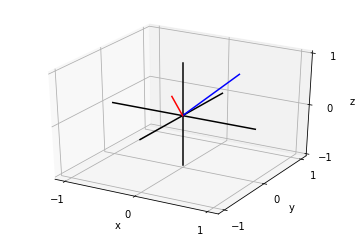

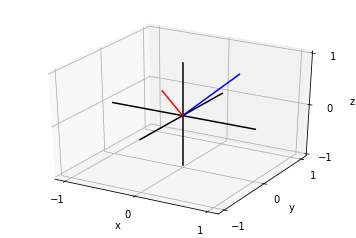

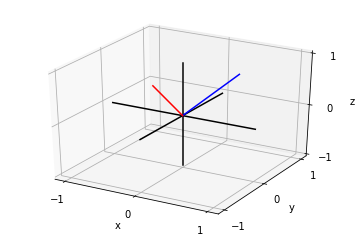

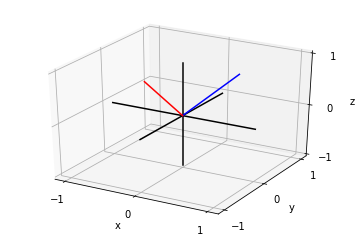

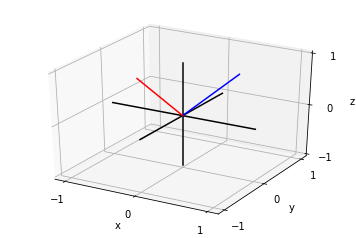

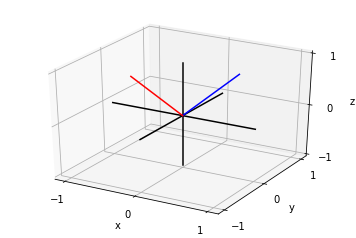

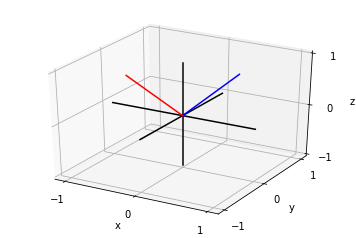

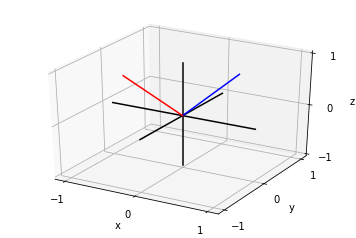

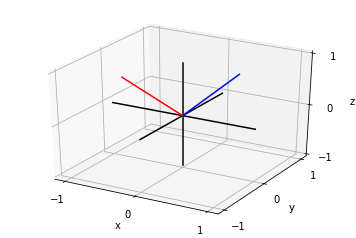

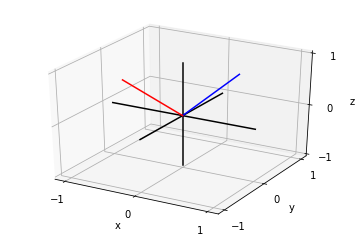

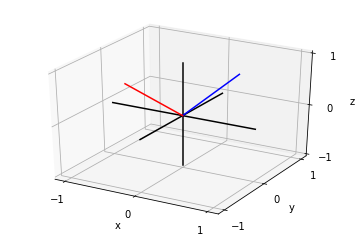

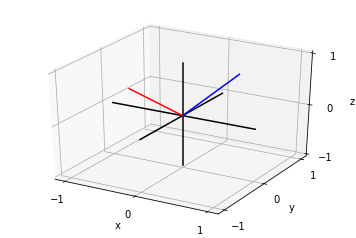

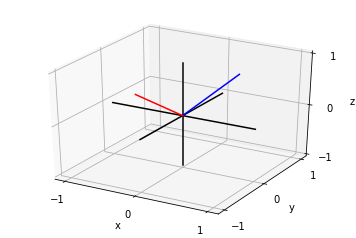

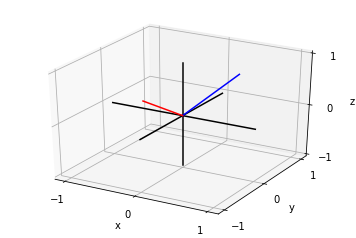

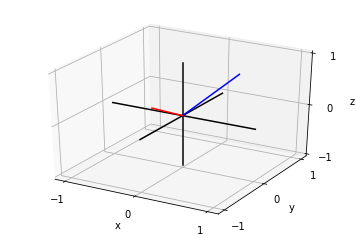

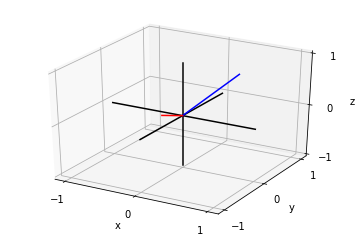

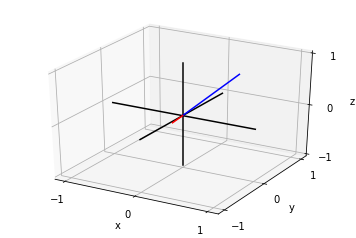

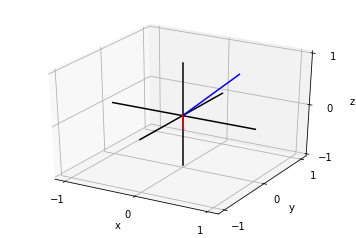

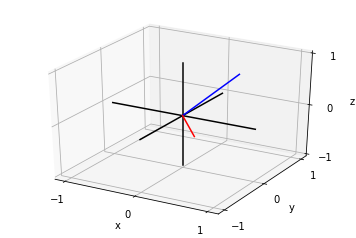

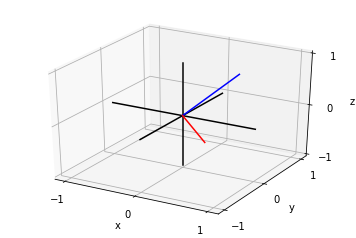

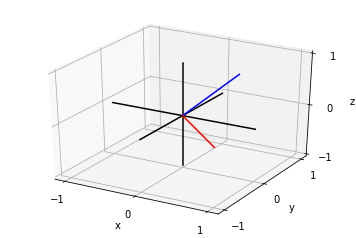

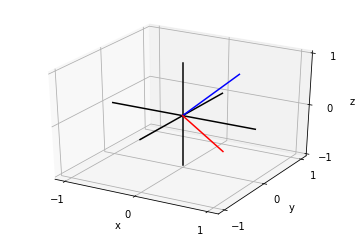

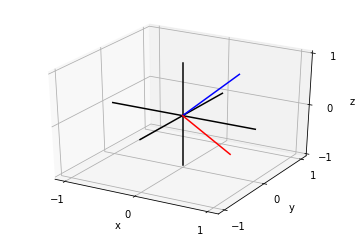

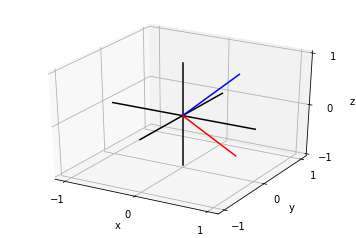

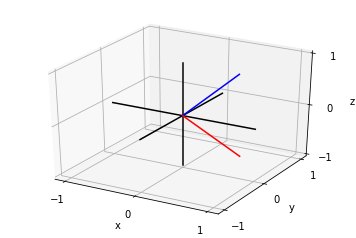

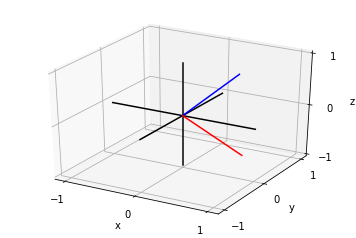

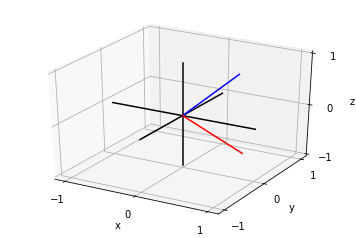

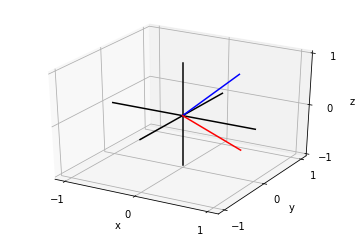

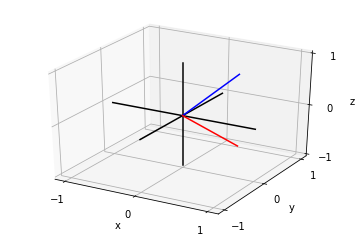

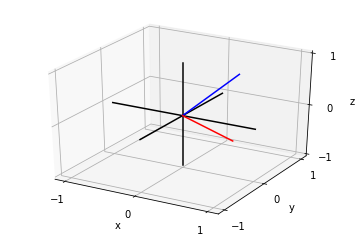

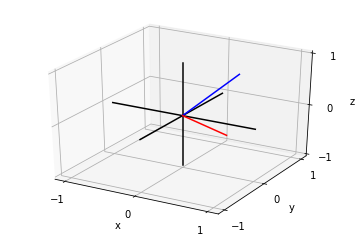

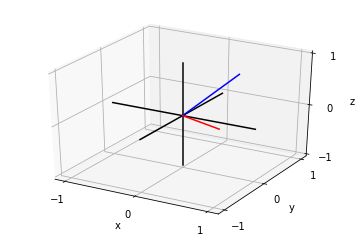

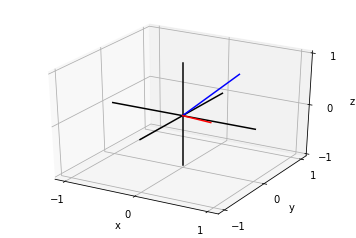

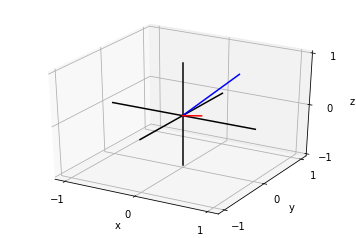

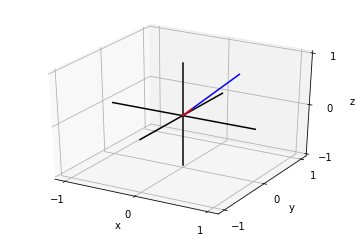

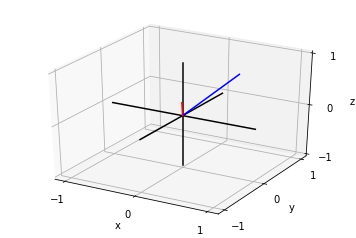

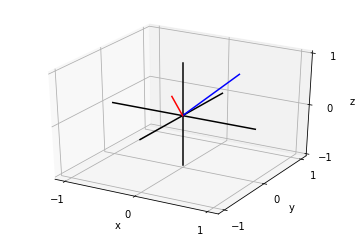

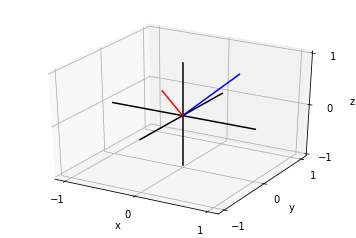

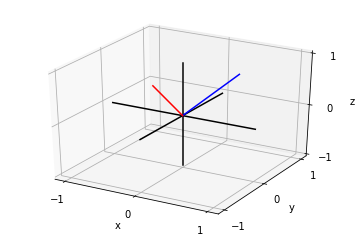

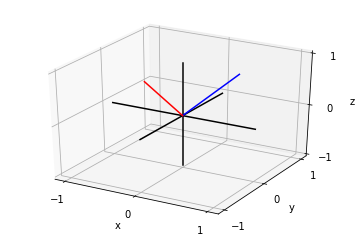

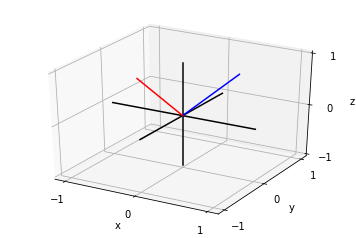

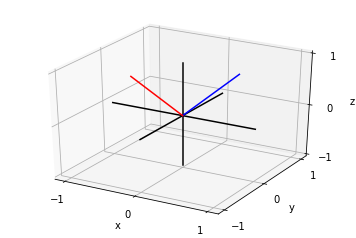

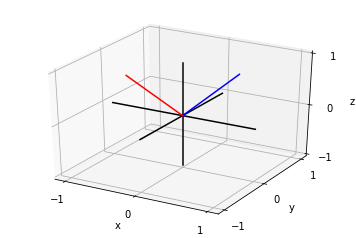

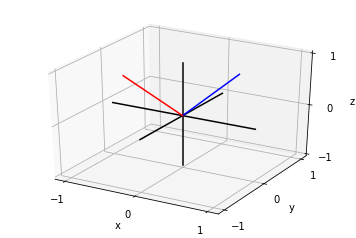

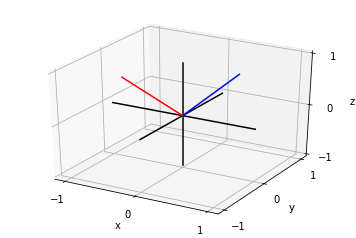

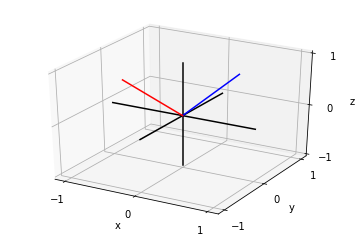

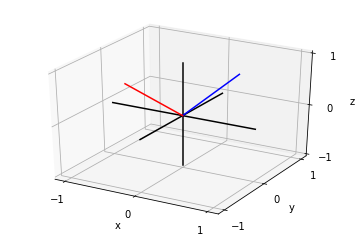

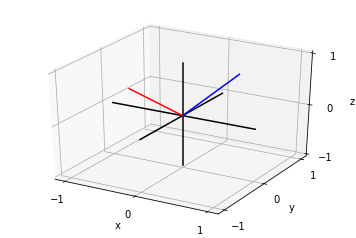

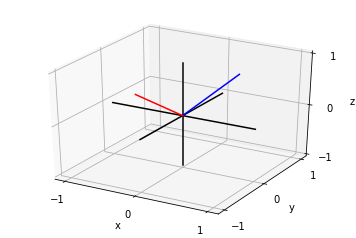

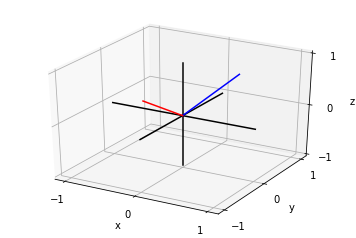

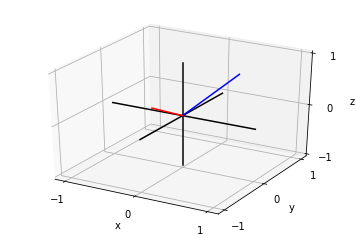

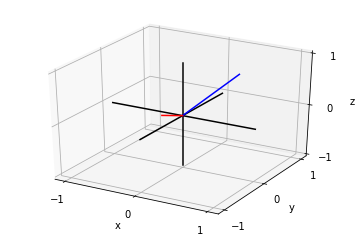

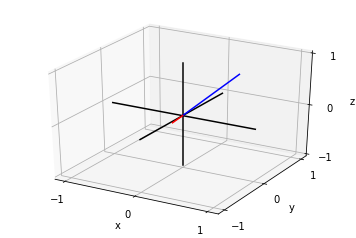

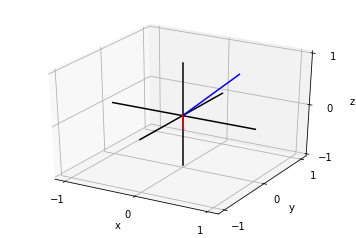

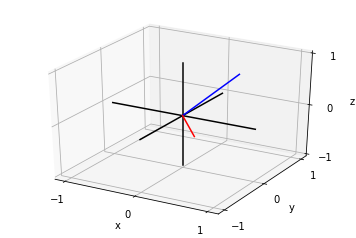

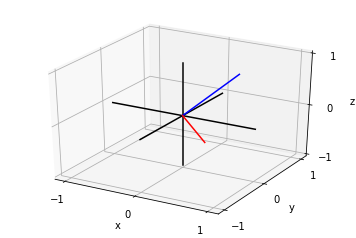

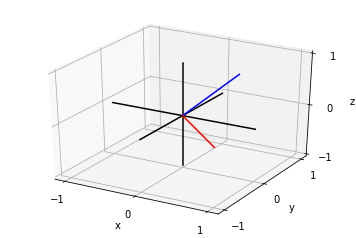

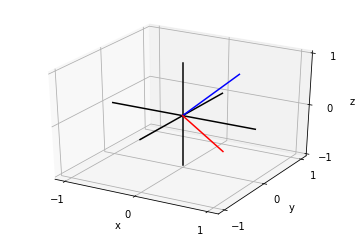

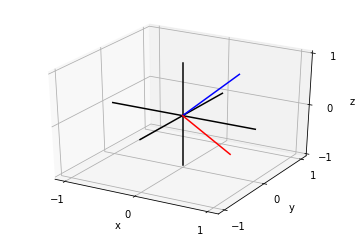

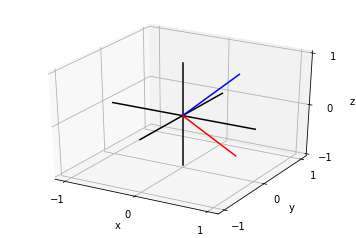

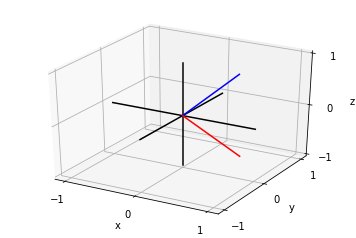

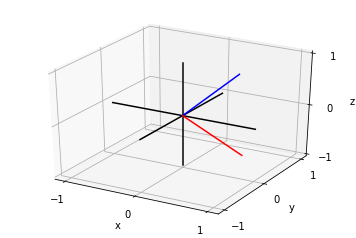

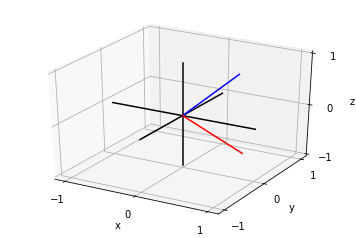

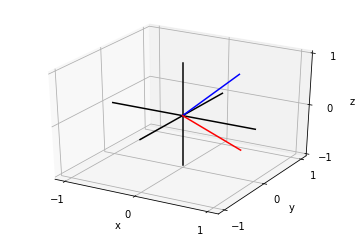

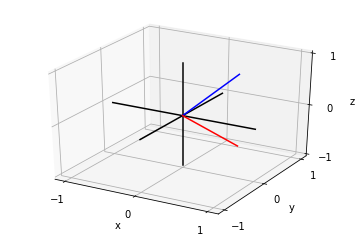

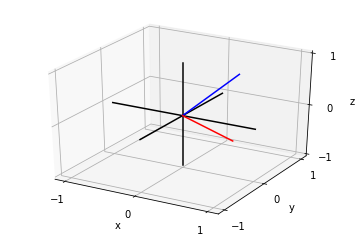

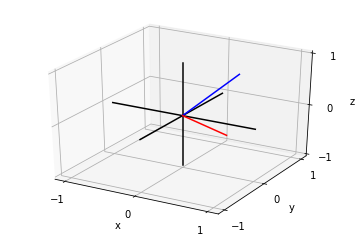

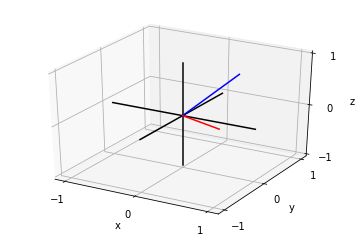

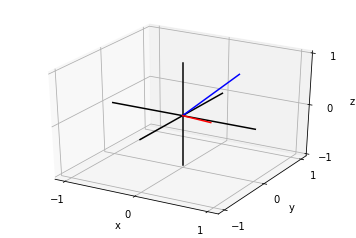

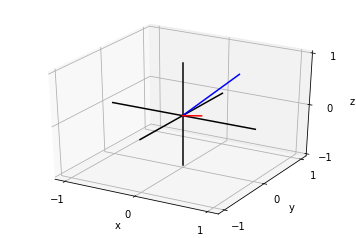

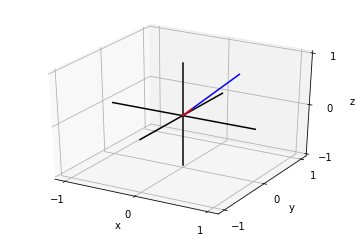

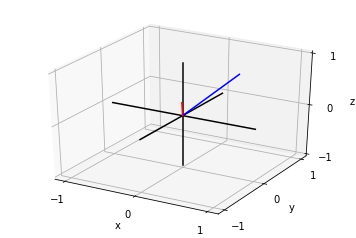

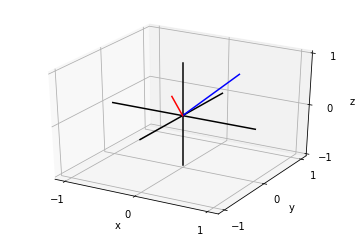

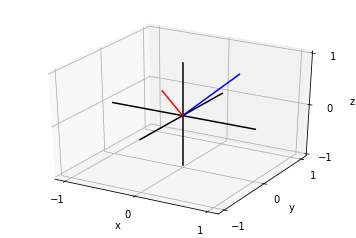

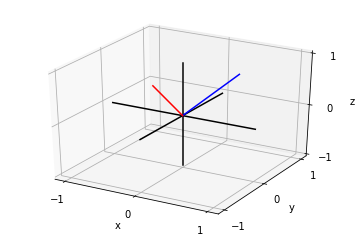

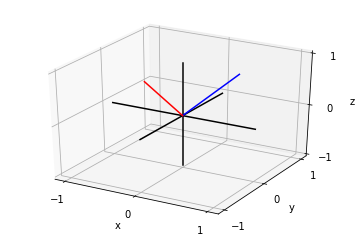

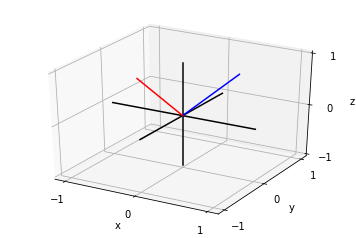

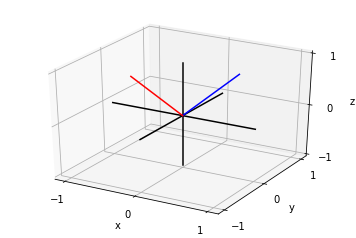

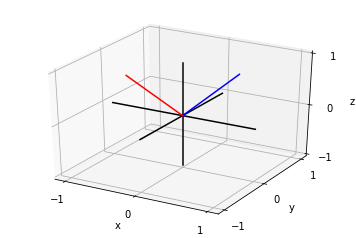

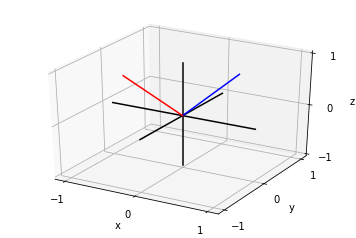

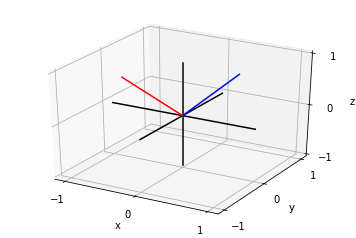

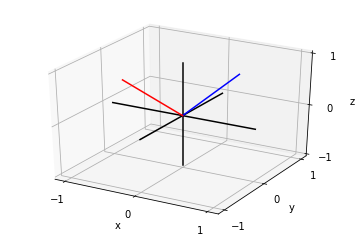

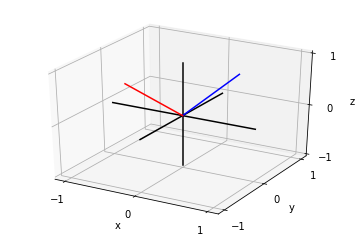

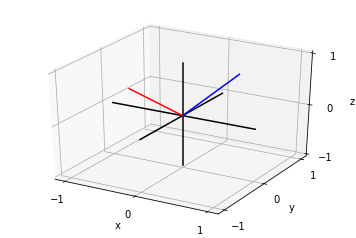

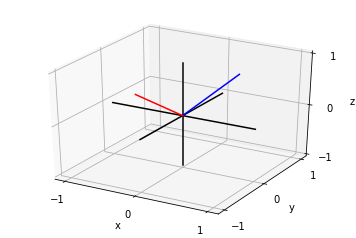

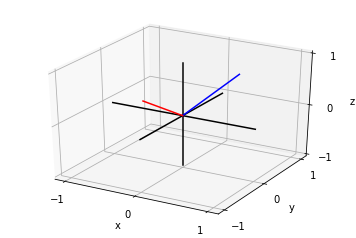

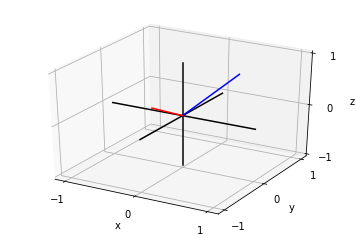

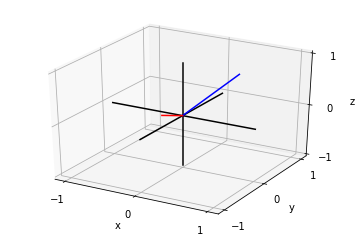

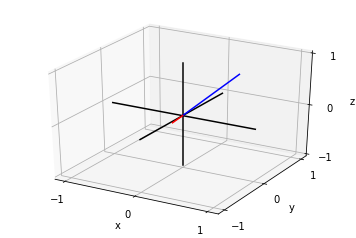

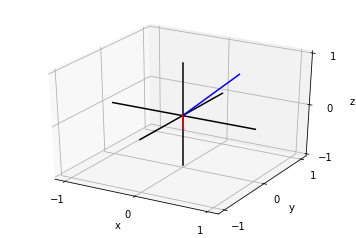

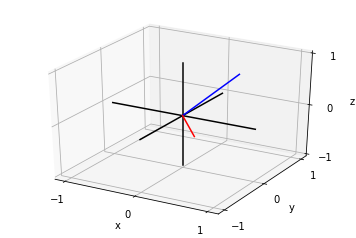

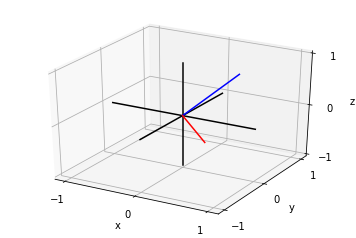

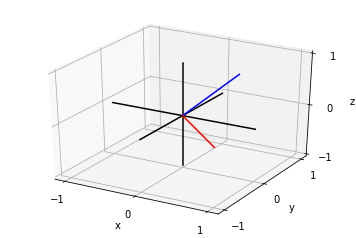

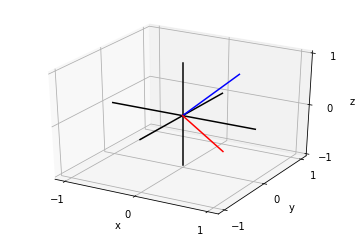

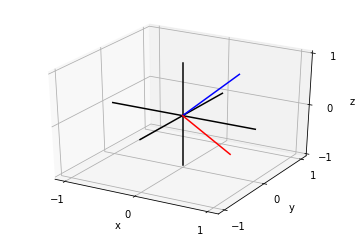

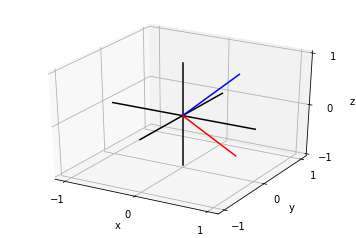

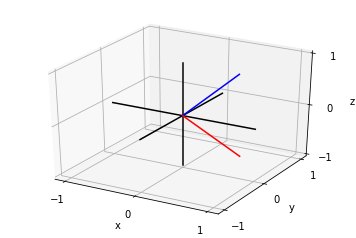

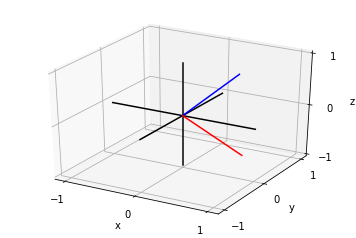

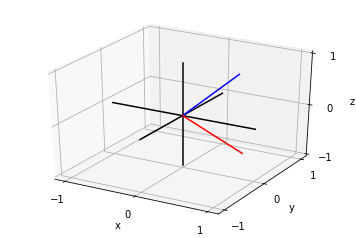

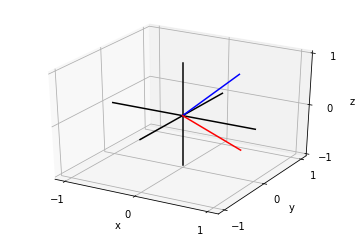

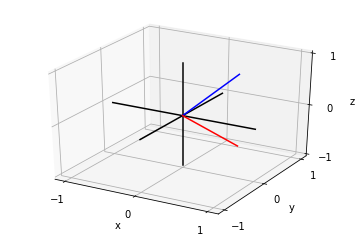

In [7]:
# spin vector (3x) by updating theta
for i in range(36*3):
    if (theta + 10) > 360.0:
        theta = theta + 10 -360.0
    else:
        theta += 10
    
    p = np.array([b*np.cos(np.deg2rad(theta)),b*np.sin(np.deg2rad(theta)),0])
    new_p = np.dot(rotation_matrix,p)
    ax = plot_coordinateFrame()
    plot_vectors(new_q,new_p,ax)
    time.sleep(.05)
    display.display(plt.gcf())
    display.clear_output(wait=True)

In [8]:
# in case a vector: <x,y,z> is provided in place of angles alpha, beta
def xyz_to_alpha_beta(vector):
    mag = np.sqrt(vector[0]**2 + vector[1]**2 + vector[2]**2)
    vector /= mag
    alpha = np.arccos(vector[2])
    # consider the case where alpha = n*pi -> sin(alpha) = 0 and beta will blow up
    # there is probably numerical unstability near x=0 and y = 0 -- be careful!
    if vector[0]==0 and vector[1]==0:
        beta = 0.0
    else:
        beta = np.arccos(vector[0]/np.sin(alpha))
    return np.rad2deg(alpha), np.rad2deg(beta)

In [13]:
test_vector = [0,1,0]
alpha, beta = xyz_to_alpha_beta(test_vector)
alpha, beta

(90.0, 90.0)

In [10]:
# update rotation matrix with new alpha, beta
rotation_matrix = np.array([[np.cos(np.deg2rad(beta))*np.cos(np.deg2rad(alpha)), -np.sin(np.deg2rad(beta)), np.cos(np.deg2rad(beta))*np.sin(np.deg2rad(alpha))],
                            [np.sin(np.deg2rad(beta))*np.cos(np.deg2rad(alpha)), np.cos(np.deg2rad(beta)), np.sin(np.deg2rad(beta))*np.sin(np.deg2rad(alpha))],
                            [-np.sin(np.deg2rad(alpha)), 0, np.cos(np.deg2rad(alpha))] ])

# confirm that vector after rotations is test_vector
vector_from_alphabeta = np.dot(rotation_matrix,np.array([0,0,1])) # <- the vector provided is the initial field vector along z-axis

print('The unit vector of the "test vector": [%s] should be equal to the backed out vector [%s]' % (', '.join(map(str, test_vector/np.sqrt(test_vector[0]**2 + test_vector[1]**2 + test_vector[2]**2))),', '.join(map(str, vector_from_alphabeta))))

The unit vector of the "test vector": [0.218217890236, 0.436435780472, 0.872871560944] should be equal to the backed out vector [0.218217890236, 0.436435780472, 0.872871560944]


In [27]:
# field strength
b = 5


# rotating field vector (perpendicular to field vector)
theta = 0
p = np.array([b*np.cos(np.deg2rad(theta)),b*np.sin(np.deg2rad(theta)),0])

### field direction ###
alpha = 0 # rotation about original y axis
beta = 0# rotation about original z axis

alpha, beta = xyz_to_alpha_beta([1,1,1])

# rotation matrix
rotation_matrix = np.array([[np.cos(np.deg2rad(beta))*np.cos(np.deg2rad(alpha)), -np.sin(np.deg2rad(beta)), np.cos(np.deg2rad(beta))*np.sin(np.deg2rad(alpha))],
                            [np.sin(np.deg2rad(beta))*np.cos(np.deg2rad(alpha)), np.cos(np.deg2rad(beta)), np.sin(np.deg2rad(beta))*np.sin(np.deg2rad(alpha))],
                            [-np.sin(np.deg2rad(alpha)), 0, np.cos(np.deg2rad(alpha))] ])
duration = 2.0
frequency = 5.0;
t = 0
update = 1/1000;
while t < duration:
    
    p = np.array([np.cos(np.deg2rad(theta)),np.sin(np.deg2rad(theta)),0])
    new_p = np.dot(rotation_matrix,p)
    print('t: %f, currents: [%s]' % (t,', '.join(map(str, b*new_p))))
    
    theta += update*frequency*360.0
    if (theta) > 360.0:
        theta -= 360.0
    
    t += update

t: 0.000000, currents: [2.04124145232, 2.04124145232, -4.08248290464]
t: 0.001000, currents: [1.92918041915, 2.15128802662, -4.08046844577]
t: 0.002000, currents: [1.81521551782, 2.25921153936, -4.07442705718]
t: 0.003000, currents: [1.69945921793, 2.36490548307, -4.064364701]
t: 0.004000, currents: [1.58202575697, 2.46826555059, -4.05029130756]
t: 0.005000, currents: [1.46303102759, 2.569189738, -4.03222076559]
t: 0.006000, currents: [1.34259246322, 2.66757844533, -4.01017090854]
t: 0.007000, currents: [1.22082892218, 2.76333457479, -3.98416349697]
t: 0.008000, currents: [1.09786057038, 2.85636362665, -3.95422419703]
t: 0.009000, currents: [0.973808762749, 2.94657379246, -3.92038255521]
t: 0.010000, currents: [0.848795923438, 3.03387604568, -3.88267196912]
t: 0.011000, currents: [0.722945425027, 3.11818422953, -3.84112965456]
t: 0.012000, currents: [0.596381466764, 3.19941514201, -3.79579660877]
t: 0.013000, currents: [0.469228951995, 3.27748861801, -3.74671757001]
t: 0.014000, curren

t: 0.561000, currents: [4.01796174435, -2.6350699758, -1.38289176855]
t: 0.562000, currents: [4.03868738735, -2.53582519424, -1.50286219311]
t: 0.563000, currents: [4.0554273335, -2.43407785937, -1.62134947413]
t: 0.564000, currents: [4.06816506248, -2.32992838352, -1.73823667896]
t: 0.565000, currents: [4.0768880037, -2.22347954965, -1.85340845406]
t: 0.566000, currents: [4.08158754867, -2.11483640991, -1.96675113877]
t: 0.567000, currents: [4.08225905951, -2.00410618196, -2.07815287755]
t: 0.568000, currents: [4.07890187351, -1.89139814316, -2.18750373035]
t: 0.569000, currents: [4.07151930382, -1.77682352275, -2.29469578106]
t: 0.570000, currents: [4.06011863613, -1.66049539205, -2.39962324408]
t: 0.571000, currents: [4.04471112153, -1.54252855286, -2.50218256867]
t: 0.572000, currents: [4.02531196538, -1.42303942423, -2.60227254116]
t: 0.573000, currents: [4.0019403123, -1.30214592748, -2.69979438482]
t: 0.574000, currents: [3.9746192273, -1.17996736992, -2.79465185737]
t: 0.575000